In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'DejaVu Sans'

In [2]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [3]:
import tensorflow as tf
import numpy as np


from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from datetime import timedelta
from tqdm import tqdm
sns.set()
tf.compat.v1.random.set_random_seed(1234)

In [4]:
stock = pd.read_csv('C:\Jupyter_Project\HSS.csv')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-29,8740,9120,8740,9120,9120,96112
1,2020-01-30,9350,9570,9200,9370,9370,175760
2,2020-01-31,9380,9710,9380,9570,9570,226732
3,2020-02-03,9440,9440,9030,9140,9140,99485
4,2020-02-04,9140,9150,9020,9110,9110,30886


Text(0, 0.5, 'price')

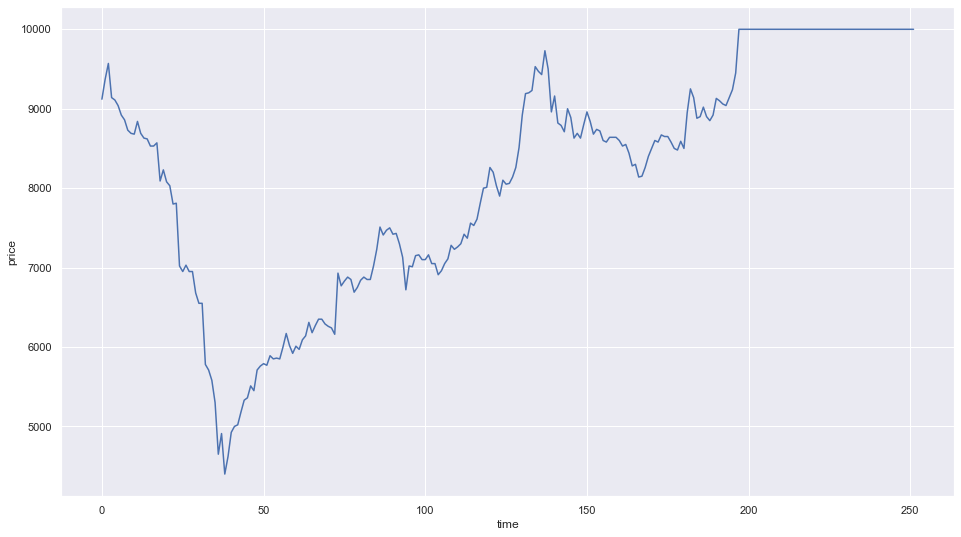

In [5]:
# 학습에 사용될 한양증권 차트입니다

plt.figure(figsize=(16,9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.72194305, 0.75167785, 0.77580071, 0.84285714, 0.0343628 ],
       [0.8241206 , 0.82718121, 0.85765125, 0.8875    , 0.06283925],
       [0.82914573, 0.85067114, 0.88967972, 0.92321429, 0.0810632 ],
       ...,
       [0.93299832, 0.89932886, 1.        , 1.        , 0.03575287],
       [0.93299832, 0.89932886, 1.        , 1.        , 0.03575287],
       [0.93299832, 0.89932886, 1.        , 1.        , 0.03575287]])

In [8]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [9]:
# Train과 Test를 분할합니다

from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close',1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

In [11]:
y_test

201    1.0
202    1.0
203    1.0
204    1.0
205    1.0
206    1.0
207    1.0
208    1.0
209    1.0
210    1.0
211    1.0
212    1.0
213    1.0
214    1.0
215    1.0
216    1.0
217    1.0
218    1.0
219    1.0
220    1.0
221    1.0
222    1.0
223    1.0
224    1.0
225    1.0
226    1.0
227    1.0
228    1.0
229    1.0
230    1.0
231    1.0
232    1.0
233    1.0
234    1.0
235    1.0
236    1.0
237    1.0
238    1.0
239    1.0
240    1.0
241    1.0
242    1.0
243    1.0
244    1.0
245    1.0
246    1.0
247    1.0
248    1.0
249    1.0
250    1.0
251    1.0
Name: Close, dtype: float64

In [12]:
x_test

,Open,High,Low,Volume
201,0.932998,0.899329,1.0,0.035753
202,0.932998,0.899329,1.0,0.035753
203,0.932998,0.899329,1.0,0.035753
204,0.932998,0.899329,1.0,0.035753
205,0.932998,0.899329,1.0,0.035753
206,0.932998,0.899329,1.0,0.035753
207,0.932998,0.899329,1.0,0.035753
208,0.932998,0.899329,1.0,0.035753
209,0.932998,0.899329,1.0,0.035753
210,0.932998,0.899329,1.0,0.035753


In [13]:
y_train

0      0.842857
1      0.887500
2      0.923214
3      0.846429
4      0.841071
         ...   
196    0.901786
197    1.000000
198    1.000000
199    1.000000
200    1.000000
Name: Close, Length: 201, dtype: float64

In [14]:
x_train

,Open,High,Low,Volume
0,0.721943,0.751678,0.775801,0.034363
1,0.824121,0.827181,0.857651,0.062839
2,0.829146,0.850671,0.889680,0.081063
3,0.839196,0.805369,0.827402,0.035569
4,0.788945,0.756711,0.825623,0.011043
...,...,...,...,...
196,0.807370,0.812081,0.848754,0.053662
197,0.932998,0.899329,1.000000,0.035753
198,0.932998,0.899329,1.000000,0.035753
199,0.932998,0.899329,1.000000,0.035753


In [15]:
x_train.shape, y_train.shape

((201, 4), (201,))

In [16]:
x_test.shape, y_test.shape

((51, 4), (51,))

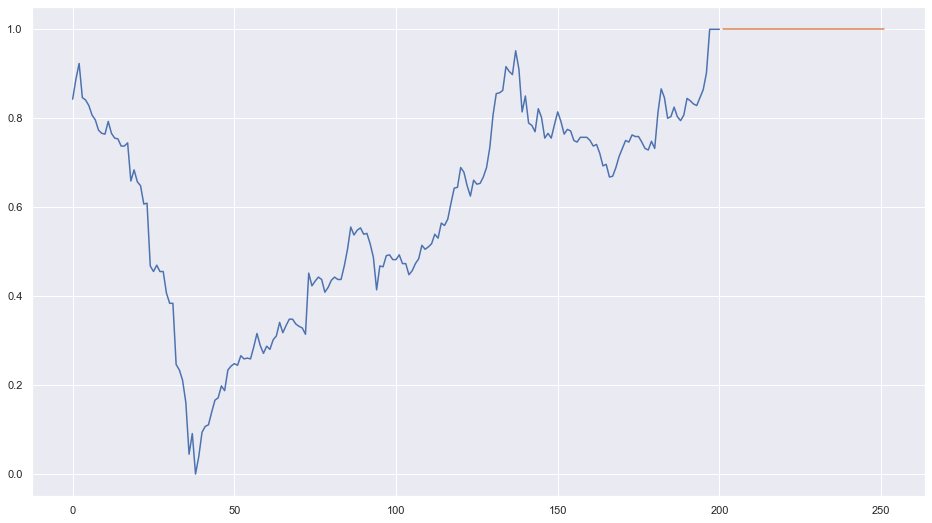

In [17]:
# Train과 Test가 분할된 영역을 차트로 표현했습니다 

plt.figure(figsize=(16,9))
plt.plot(y_train)
plt.plot(y_test)

In [18]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std
 
x_test -= mean
x_test /= std

In [19]:
from keras import models
from keras import layers

def build_model():
    # 동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용합니다
    # 마지막 레이어는 주택가격인 Y값 1개만 예측하면 되기 때문에 뉴런 수는 1개
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    # 손실함수는 mse(예측값과 실제값 사이 거리의 제곱) 이용
    # 모니터링은 mse(예측값과 실제값 사이 거리의 절댓값) 이용
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [20]:
# k-겹 교차 검증 실시
# 현재 10겹이므로 한번 실행마다 50번 반복하고 결국 500번을 훈련하게 된다
# #0의 10개의 mae평균, #1의 10개의 mae평균,,,50번대의 10개의 mae평균,,,이렇게 500개의 mae를 구한다


k = 10
# len(train_data), 404
num_val_samples = len(x_train) // k # 101
num_epochs = 50
all_scores = []

num_epochs = 50
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
 
    # 훈련 데이터 준비: 다른 분할 전체
    partial_x_train = np.concatenate(
        [x_train[:i * num_val_samples],
         x_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_y_train = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)
 
    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # model.fit()함수로 회귀 모델을 학습시킨다
    history = model.fit(partial_x_train, partial_y_train,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
 
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3
처리중인 폴드 # 4
처리중인 폴드 # 5
처리중인 폴드 # 6
처리중인 폴드 # 7
처리중인 폴드 # 8
처리중인 폴드 # 9


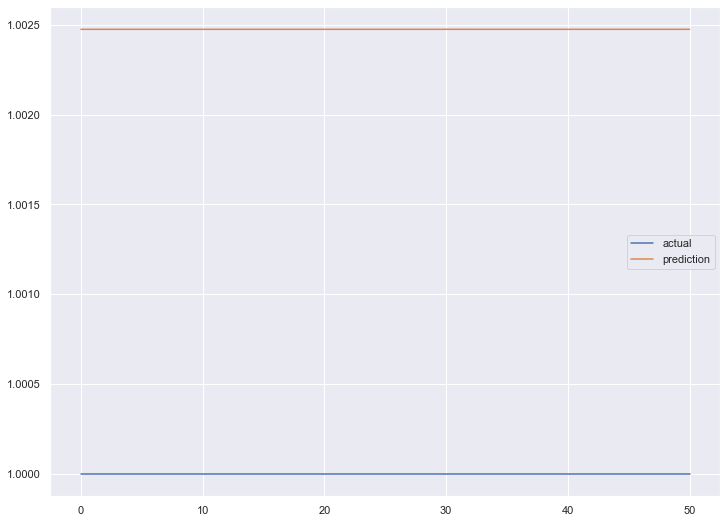

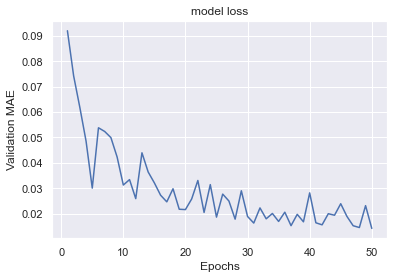

In [21]:
import matplotlib.pyplot as plt

pred = model.predict(x_test)
pred.shape

plt.figure(figsize=(12,9))
plt.plot(np.asarray(y_test), label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.title('model loss')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()